In [5]:
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
heart_data = pd.read_csv("./heart.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart_data.shape

(303, 14)

In [14]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [31]:
def shuffle(df , axis = 1):
    
    new_df = df.copy()
    new_df = new_df.sample(frac = 1).reset_index(drop = True)
    return new_df

shuffled_data = shuffle(data)
shuffled_data.head()
    

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,43,1,0,150,247,0,1,171,0,1.5,2,0,2
1,56,1,0,130,283,1,0,103,1,1.6,0,0,3
2,71,0,2,110,265,1,0,130,0,0.0,2,1,2
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2
4,42,0,2,120,209,0,1,173,0,0.0,1,0,2


In [ ]:
data  = shuffled_data.drop("target" , axis = 1)
labels = shuffled_data["target"]

In [32]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(data , labels , test_size = 0.2 , random_state = 42)
print("{} : {} : {} : {}".format(len(X_train) , len(X_test) , len(y_train) , len(y_test)))

242 : 61 : 242 : 61


In [33]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [35]:
from sklearn.tree import DecisionTreeClassifier

des_classifier = DecisionTreeClassifier(random_state = 42)
des_classifier.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [37]:
from sklearn.metrics import accuracy_score

predictions = des_classifier.predict(X_test)
accuracy_score(predictions , y_test)



0.75409836065573765

In [44]:
X_train.iloc[1].shape

(13,)

In [57]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def cross_val_score(clf , X_train , y_train ,  n_splits = 3 , random_state = 42):
    
    skfolds = StratifiedKFold(n_splits = n_splits , random_state = random_state)
    fold_index = 1
    
    for train_index , test_index in skfolds.split(X_train , y_train):
        clone_clf = clone(clf)
        
        
        X_train_folds = X_train.iloc[train_index]
        y_train_folds = y_train.iloc[train_index]
        
        X_test_folds = X_train.iloc[test_index]
        y_test_folds = y_train.iloc[test_index]
        
        
        clone_clf.fit(X_train_folds , y_train_folds)
        y_preds = clone_clf.predict(X_test_folds)
        
        n_correct = sum(y_preds == y_test_folds)
        
        print("Score for fold {} => {}".format(fold_index , n_correct / len(y_preds)))
        fold_index += 1
        
        
        

cross_val_score(des_classifier , X_train , y_train)

Score for fold 1 => 0.6585365853658537
Score for fold 2 => 0.75
Score for fold 3 => 0.7625


In [58]:
from sklearn.svm import SVC

sv_cls = SVC(gamma = "auto")
sv_cls.fit(X_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:

predictions = sv_cls.predict(X_test)
accuracy_score(predictions , y_test)

0.54098360655737709

In [61]:
cross_val_score(sv_cls , X_train , y_train)

Score for fold 1 => 0.5487804878048781
Score for fold 2 => 0.55
Score for fold 3 => 0.5625


In [63]:
from sklearn.naive_bayes import GaussianNB

naive_cls = GaussianNB()
naive_cls.fit(X_train , y_train)

GaussianNB(priors=None)

In [64]:
predictions = naive_cls.predict(X_test)
accuracy_score(predictions , y_test)

0.86885245901639341

In [65]:
cross_val_score(naive_cls , X_train , y_train)

Score for fold 1 => 0.8170731707317073
Score for fold 2 => 0.7625
Score for fold 3 => 0.8


In [71]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true = y_test , y_pred = predictions)
confmat

array([[26,  3],
       [ 5, 27]])

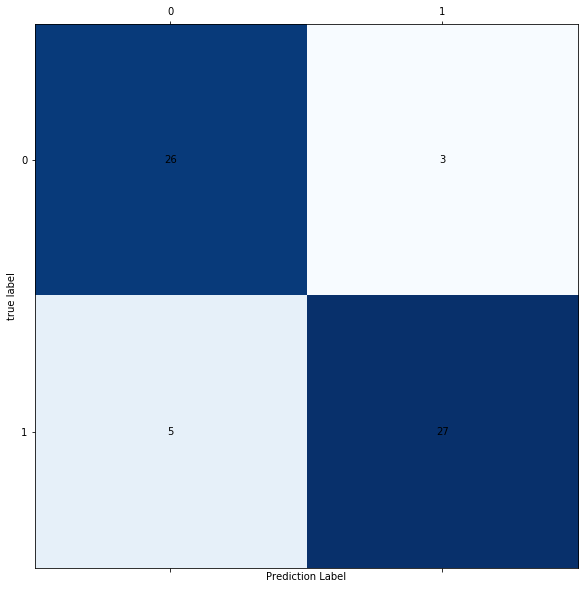

In [73]:
from matplotlib import pyplot as plt


def draw_confusion_matrix(confmat ):
    
    fig , ax = plt.subplots(figsize = (12 , 10))
    ax.matshow(confmat , cmap = plt.cm.Blues)
    
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text( x = j , y = i , s  = confmat[i , j] , va = "center" , ha = "center")
            
    plt.xlabel("Prediction Label")
    plt.ylabel("true label")
    plt.show()
                    
draw_confusion_matrix(confmat) 
    
                    